<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# change the working directory of your code on google drive
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('wine.csv')

X=df.iloc[:,1:].copy()
target=df.iloc[:,0].copy()
df.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

In [0]:
np.unique(df['Wine'])

array([1, 2, 3])

In [0]:
# 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(13,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 

mu_k = []

for i,Wine in enumerate(np.unique(df['Wine'])):
    mu_k.append(np.mean(X_train.where(df['Wine']==Wine),axis=0))
mu_k = np.array(mu_k).T


In [0]:
# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,Wine in enumerate(np.unique(df['Wine'])):
    a = np.array(X_train.where(df['Wine']==Wine).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['Wine']==1))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [0]:
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))
print("eigen values are",eigval)
print("/neigen vectors are",eigvec)

eigen values are [ 1.72324172e+01+0.00000000e+00j -1.39471767e-15+0.00000000e+00j
  5.17527977e+00+0.00000000e+00j -1.47503061e-15+7.13422427e-16j
 -1.47503061e-15-7.13422427e-16j  6.85093257e-16+9.87995012e-16j
  6.85093257e-16-9.87995012e-16j  5.82129403e-16+1.80055150e-16j
  5.82129403e-16-1.80055150e-16j -3.51642481e-16+3.70973251e-16j
 -3.51642481e-16-3.70973251e-16j  2.58950914e-18+0.00000000e+00j
 -2.02431278e-16+0.00000000e+00j]
eigen vectors are [[-6.83157208e-02+0.j         -7.84411003e-01+0.j
   3.65634854e-01+0.j          7.46337265e-01+0.j
   7.46337265e-01-0.j          2.12268147e-01+0.41507364j
   2.12268147e-01-0.41507364j -6.77942964e-01+0.j
  -6.77942964e-01-0.j         -8.46559456e-02-0.22358294j
  -8.46559456e-02+0.22358294j -7.59242611e-02+0.j
   2.87557246e-01+0.j        ]
 [ 4.38087098e-02+0.j          1.38588768e-01+0.j
   2.44520435e-01+0.j         -1.23632245e-01+0.0318124j
  -1.23632245e-01-0.0318124j  -1.84724278e-01-0.05578811j
  -1.84724278e-01+0.05578811j

In [0]:
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1]
               [:,np.newaxis].real)) # Select two largest
print(w)

[[-0.06831572  0.36563485]
 [ 0.04380871  0.24452044]
 [-0.01561189  0.36746818]
 [ 0.18945451 -0.30641064]
 [-0.00766036 -0.02278583]
 [ 0.24232973 -0.02602705]
 [-0.76873781 -0.16167651]
 [-0.08350168 -0.06608853]
 [ 0.09076592 -0.16569696]
 [ 0.22200901  0.33651651]
 [-0.05976429 -0.19614201]
 [-0.36331654 -0.02071461]
 [-0.32782183  0.60522505]]


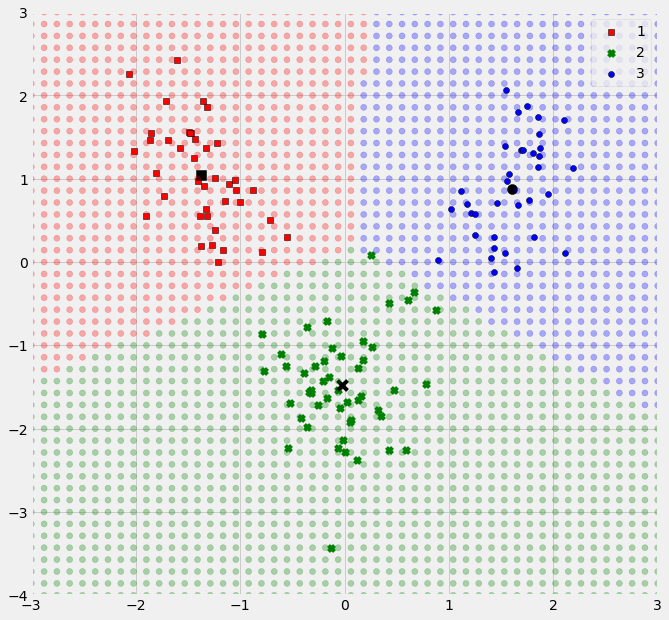

In [0]:
# 6. Transform the data with Y=X*w
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')


# Plot the voroni spaces
means = []
for m,Wine in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==Wine],axis=0))
    ax0.scatter(np.mean(Y[y_train==Wine],axis=0)[0],np.mean(Y[y_train==Wine],
                                                            axis=0)[1],marker=m,
                                                            c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)
plt.show()
